In [35]:
import pandas as pd
import os

# DNA Methylation

In [ ]:
##########################################################################
# R code to process raw IDAT files using sesame package in Python via rpy2
##########################################################################
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import conversion, default_converter

idat_dir = "/home/jamie/Documents/AI4BI/BiomarkersOfAgeChallenge/GSE246337_RAW/"

with conversion.localconverter(default_converter):
    sesame = importr('sesame')
    ro.r(f'''
        library(sesame)
        sesame_checkVersion()
      	sesameDataCache()
     	print(tools::R_user_dir("ExperimentHub", which="cache"))
      	qcs = openSesame("{idat_dir}", prep="", func=sesameQC_calcStats, funs="detection")
      	betas = openSesame("{idat_dir}", BPPARAM = BiocParallel::MulticoreParam(2), func = getBetas)
	  	allele_freqs = openSesame("{idat_dir}", func = getAFs)
	  	sdfs = openSesame("{idat_dir}", prep="QCDPB", func = NULL)
   	  	pvals = openSesame("{idat_dir}", func = pOOBAH, return.pval=TRUE)
    ''')
    qcs = list(ro.r('qcs'))
    betas = np.array(ro.r('betas'))
    allele_freqs = np.array(ro.r('allele_freqs'))
    sdfs = np.array(ro.r('sdfs'))
    pvals = np.array(ro.r('pvals'))

## EDA

In [ ]:
###############################################################
# Beta values already computed and saved as GSE246337_betas.csv 
# Rows are CpG sites (features), columns are samples
###############################################################

betas = pd.read_csv("GSE246337_betas.csv", index_col=0)
betas.head()


,207686140044_R01C01,207686140044_R02C01,207686140044_R03C01,207686140044_R04C01,207686140044_R05C01,207686140044_R06C01,207686140044_R07C01,207686140044_R08C01,207686140076_R01C01,207686140076_R02C01,...,207805820161_R07C01,207805820161_R08C01,207805820171_R01C01,207805820171_R02C01,207805820171_R03C01,207805820171_R04C01,207805820171_R05C01,207805820171_R06C01,207805820171_R07C01,207805820171_R08C01
cg00000029_TC21,0.720084,0.453491,0.535564,0.496694,0.525362,0.525319,0.434330,0.408679,0.594240,0.525524,...,0.485967,0.452223,0.567441,0.473869,0.523240,0.554518,0.446254,0.487361,0.337215,0.062426
cg00000109_TC21,0.938044,0.925149,0.949446,0.934988,0.930916,0.949987,0.939432,0.932865,0.943177,0.930060,...,0.943495,0.915393,0.953727,0.925223,0.943845,0.940539,0.933257,0.938523,0.940187,0.942090
cg00000155_BC21,0.957093,0.959030,0.948919,0.954976,0.955666,0.957251,0.955374,0.947911,0.946194,0.963470,...,0.953201,0.944205,0.962515,0.957490,0.962842,0.956204,0.949011,0.966912,0.968026,0.970274
cg00000158_BC21,0.965191,0.957272,0.967278,0.955776,0.970660,0.966632,0.976063,0.971095,0.967079,0.954718,...,0.961862,0.968069,0.962177,0.969633,0.960911,0.965914,0.973085,0.971039,0.969745,0.969660
cg00000165_TC21,0.144061,0.122099,0.167346,0.116861,0.208221,0.198627,0.161761,0.098129,0.166552,0.136695,...,0.175452,0.354382,0.131584,0.186962,0.169110,0.192639,0.166137,0.156199,0.133038,0.641788


In [4]:
betas.shape

(937690, 500)

In [5]:
betas.describe()

,207686140044_R01C01,207686140044_R02C01,207686140044_R03C01,207686140044_R04C01,207686140044_R05C01,207686140044_R06C01,207686140044_R07C01,207686140044_R08C01,207686140076_R01C01,207686140076_R02C01,...,207805820161_R07C01,207805820161_R08C01,207805820171_R01C01,207805820171_R02C01,207805820171_R03C01,207805820171_R04C01,207805820171_R05C01,207805820171_R06C01,207805820171_R07C01,207805820171_R08C01
count,893786.000000,887924.000000,893019.000000,891758.000000,894765.000000,894557.000000,895592.000000,898590.000000,897491.000000,890540.000000,...,884190.000000,886485.000000,888275.000000,899585.000000,889322.000000,891671.000000,896899.000000,897316.000000,896221.000000,896947.000000
mean,0.632324,0.625617,0.629608,0.628098,0.625219,0.627548,0.618811,0.623185,0.633191,0.625836,...,0.625450,0.626422,0.624777,0.625575,0.633029,0.631592,0.625610,0.631909,0.626946,0.635765
std,0.359507,0.354507,0.362031,0.355753,0.357160,0.354825,0.358204,0.371804,0.358607,0.355006,...,0.361985,0.364694,0.356435,0.361202,0.363336,0.358111,0.372707,0.365578,0.373659,0.380576
min,0.006801,0.007902,0.007040,0.008162,0.007337,0.007154,0.006819,0.006808,0.007673,0.008645,...,0.008035,0.006922,0.008200,0.006482,0.007978,0.007141,0.007517,0.007259,0.006335,0.006734
25%,0.243290,0.244865,0.224893,0.250337,0.241821,0.257019,0.223450,0.172150,0.254470,0.241915,...,0.212634,0.202744,0.237916,0.228941,0.222566,0.253848,0.162606,0.225418,0.174760,0.148654
50%,0.839880,0.821537,0.838462,0.823654,0.819739,0.818399,0.809815,0.844442,0.836568,0.822749,...,0.833279,0.841919,0.819397,0.824052,0.847211,0.830259,0.850107,0.845347,0.854354,0.877883
75%,0.930105,0.921332,0.929748,0.925685,0.926378,0.925436,0.924222,0.935909,0.932077,0.923008,...,0.927183,0.928850,0.923817,0.930379,0.931667,0.929648,0.936141,0.936403,0.939470,0.945145
max,0.994578,0.994257,0.994795,0.994432,0.994581,0.994795,0.994897,0.994929,0.994571,0.993633,...,0.994669,0.995179,0.994610,0.995122,0.994605,0.995008,0.994684,0.995306,0.995394,0.995869


In [6]:
# Missing values per column
missing_values = betas.isnull().sum(axis=0)
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
207686140044_R01C01    43904
207686140044_R02C01    49766
207686140044_R03C01    44671
207686140044_R04C01    45932
207686140044_R05C01    42925
                       ...  
207805820171_R04C01    46019
207805820171_R05C01    40791
207805820171_R06C01    40374
207805820171_R07C01    41469
207805820171_R08C01    40743
Length: 500, dtype: int64


In [ ]:
print(f"Number of duplicated probes: {len(betas.index[betas.index.duplicated(keep=False)])}")
print(f"Number of duplicated samples: {len(betas.columns[betas.columns.duplicated(keep=False)])}")

Number of duplicated probes: 0
Number of duplicated samples: 0


## Preprocessing pipeline

- Assume raw data has been preprocessed using SeSAMe (R package) and beta values have some degree of quality control
- Remove duplicate probes and samples
- Remove invalid beta values outside range [0,1]
- Remove samples with >10% missing values
- Transform beta values to M values using M = log2(beta/(1-beta)) -> more robust
- Perform train / val / test split (not stratified)
- Remove probes with >10% missing values in training set from all splits (feature selection)
- Remove probes with variance <1e-5 across samples (feature selection)
- Use mean imputation to fill in remaining missing values (column/sample-wise?)
- Z-standardisation
- Dimensionality reduction via truncated SVD

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, PCA

BETAS_CSV = "GSE246337_betas.csv"
METADATA_TXT = "GSE246337_series_matrix.txt"
METADATA_CSV = "GSE246337_metadata.csv"
SAMPLE_MISS_THR = 0.10 # Drop samples with >10% missing β (pre-split)
PROBE_MISS_THR = 0.10 # Drop probes with >10% missing (train-only)
PROBE_VAR_THR = 1e-5 # Drop near-constant probes (train-only)
TEST_SIZE = 0.20
VAL_SIZE = 0.20
K = 15
SEED = 42
M_EPS = 1e-9 # To avoid log(0) in M value transformation
DIM_REDUCTION = "PCA" # or "PCA"|"SVD"

# Read metadata file
with open(METADATA_TXT, "r", encoding="utf-8", errors="ignore") as f:
    lines = [ln.rstrip("\n") for ln in f]
# Parse sample descriptions (align with column names in betas csv)
row = next(ln for ln in lines if ln.startswith("!Sample_description"))
descriptions = [v.strip().strip('"').strip("'") for v in row.split("\t")[1:]]
# Parse sample characteristics, i.e. extract age and sex
rows = [ln for ln in lines if ln.startswith("!Sample_characteristics_")]
for row in rows:
    cells = row.split('\t')
    vals = [c.strip().strip('"').strip("'") for c in cells[1:]]
    if any(re.compile(rf'(?i)\bSex\s*:').search(v) for v in vals):
        sex = [re.compile(rf'(?i).*Sex\s*:\s*').sub('', v).strip() for v in vals]
    if any(re.compile(rf'(?i)\bage\s*:').search(v) for v in vals):
        age = [re.compile(rf'(?i).*age\s*:\s*').sub('', v).strip() for v in vals]
# Construct metadata dataframe and align with beta values csv before saving
metadata_df = pd.DataFrame({"sex": sex, "age": age}, index=descriptions)
betas_df = pd.read_csv(BETAS_CSV, index_col=0)
metadata_df = metadata_df.reindex(betas_df.columns)
metadata_df.to_csv(METADATA_CSV)
# Remove duplicate rows (probes / CpG sites / features) and columns (samples)
betas_df = betas_df.loc[~betas_df.index.duplicated(keep="first")]
betas_df = betas_df.loc[:, ~betas_df.columns.duplicated(keep="first")]
# Remove invalid values
betas_df = betas_df.where((betas_df >= 0.0) & (betas_df <= 1.0))
# Drop high-missingness samples pre-split
miss_col = betas_df.isna().mean(axis=0)
keep_cols = miss_col[miss_col <= SAMPLE_MISS_THR].index
betas_df = betas_df.loc[:, keep_cols]
metadata_df = metadata_df.reindex(keep_cols)
# Convert to numerical values
metadata_df["sex"] = metadata_df["sex"].astype(str).str.upper().map({"M": 1, "F": 0})
metadata_df["age"] = pd.to_numeric(metadata_df["age"].astype(str).str.replace(">89", "90"), errors="coerce")
# Transform to M values
m_vals = np.log((betas_df + M_EPS) / (1.0 - betas_df + M_EPS))
# Split data into train/val/test (no stratification)
cols = m_vals.columns.tolist()
cols_train, cols_test = train_test_split(cols, test_size=TEST_SIZE, random_state=SEED)
cols_train, cols_val = train_test_split(cols_train, test_size=VAL_SIZE/(1.0-TEST_SIZE), random_state=SEED)
# Train-only probe mask
mvals_train = m_vals.loc[:, cols_train]
miss_probe = mvals_train.isna().mean(axis=1)
var_probe = mvals_train.var(axis=1)
keep_probes = miss_probe.le(PROBE_MISS_THR) & var_probe.gt(PROBE_VAR_THR)
train_probe_mask = keep_probes[keep_probes].index
# Apply mask to val and test sets and transform to SAMPLE x PROBE features
X_train = m_vals.loc[train_probe_mask, cols_train].T
X_val = m_vals.loc[train_probe_mask, cols_val].T
X_test = m_vals.loc[train_probe_mask, cols_test].T
# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)
# Scale features
scaler = StandardScaler(with_mean=True, with_std=True)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
# Dimensionality reduction
k = int(min(K, max(2, X_train.shape[1] - 1)))
reducer = TruncatedSVD(n_components=k, random_state=SEED) if DIM_REDUCTION == "SVD" else PCA(n_components=k, random_state=SEED)
Z_train = reducer.fit_transform(X_train)
Z_val = reducer.transform(X_val)
Z_test = reducer.transform(X_test)
# Targets aligned to splits
y_age_train = metadata_df.loc[cols_train, "age"].to_numpy()
y_age_val = metadata_df.loc[cols_val, "age"].to_numpy()
y_age_test = metadata_df.loc[cols_test, "age"].to_numpy()
y_sex_train = metadata_df.loc[cols_train, "sex"].to_numpy()
y_sex_val = metadata_df.loc[cols_val, "sex"].to_numpy()
y_sex_test = metadata_df.loc[cols_test, "sex"].to_numpy()
# Save feature/label splits
np.savez_compressed(
    "features_labels.npz",
    Z_train=Z_train, Z_val=Z_val, Z_test=Z_test,
    y_age_train=y_age_train, y_age_val=y_age_val, y_age_test=y_age_test,
    y_sex_train=y_sex_train, y_sex_val=y_sex_val, y_sex_test=y_sex_test
)

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, average_precision_score, accuracy_score, f1_score

# Load features and labels
data = np.load("features_labels.npz")
Z_train, Z_val, Z_test = data["Z_train"], data["Z_val"], data["Z_test"]
y_age_train, y_age_val, y_age_test = data["y_age_train"], data["y_age_val"], data["y_age_test"]
y_sex_train, y_sex_val, y_sex_test = data["y_sex_train"], data["y_sex_val"], data["y_sex_test"]

print("AGE (LINEAR REGRESSION):")
linreg = LinearRegression()
linreg.fit(np.vstack([Z_train, Z_val]), np.concatenate([y_age_train, y_age_val]))
pred_trainval_lin = linreg.predict(np.vstack([Z_train, Z_val]))
print("Train+val:")
print(f"MAE : {mean_absolute_error(np.concatenate([y_age_train, y_age_val]), pred_trainval_lin):.3f}")
print(f"RMSE: {mean_squared_error(np.concatenate([y_age_train, y_age_val]), pred_trainval_lin) ** 0.5:.3f}")
print(f"R2  : {r2_score(np.concatenate([y_age_train, y_age_val]), pred_trainval_lin):.3f}")
pred_test_lin = linreg.predict(Z_test)
print("Test:")
print(f"MAE : {mean_absolute_error(y_age_test, pred_test_lin):.3f}")
print(f"RMSE: {mean_squared_error(y_age_test, pred_test_lin) ** 0.5:.3f}")
print(f"R2  : {r2_score(y_age_test, pred_test_lin):.3f}")

print()

print("SEX (LOGISTIC REGRESSION):")
# Manual train set fitting + val set tuning
best_C, best_auc = None, -np.inf
for C in np.logspace(-10, 10, 20):
    lr = LogisticRegression(C=C, max_iter=5000, class_weight="balanced", solver="lbfgs", n_jobs=-1, random_state=0)
    lr.fit(Z_train, y_sex_train)
    proba_val = lr.predict_proba(Z_val)[:, 1]
    auc = roc_auc_score(y_sex_val, proba_val)
    if auc > best_auc:
        best_auc, best_C = auc, C
print(f"Best C (val):  {best_C:.3f}")
# Refit on train+val with best C
lr = LogisticRegression(C=best_C, max_iter=5000, class_weight="balanced", solver="lbfgs", n_jobs=-1, random_state=0)
lr.fit(np.vstack([Z_train, Z_val]), np.concatenate([y_sex_train, y_sex_val]))
proba_trainval = lr.predict_proba(np.vstack([Z_train, Z_val]))[:, 1]
pred_trainval_cls = (proba_trainval >= 0.5).astype(int)
print("Train+val:")
print(f"ROC-AUC: {roc_auc_score(np.concatenate([y_sex_train, y_sex_val]), proba_trainval):.3f}")
print(f"PR-AUC:  {average_precision_score(np.concatenate([y_sex_train, y_sex_val]), proba_trainval):.3f}")
print(f"ACC: 	 {accuracy_score(np.concatenate([y_sex_train, y_sex_val]), pred_trainval_cls):.3f}")
print(f"F1: 	 {f1_score(np.concatenate([y_sex_train, y_sex_val]), pred_trainval_cls):.3f}")
proba_test = lr.predict_proba(Z_test)[:, 1]
pred_test_cls = (proba_test >= 0.5).astype(int)
print("Test:")
print(f"ROC-AUC: {roc_auc_score(y_sex_test, proba_test):.3f}")
print(f"PR-AUC:  {average_precision_score(y_sex_test, proba_test):.3f}")
print(f"ACC: 	 {accuracy_score(y_sex_test, pred_test_cls):.3f}")
print(f"F1: 	 {f1_score(y_sex_test, pred_test_cls):.3f}")

AGE (LINEAR REGRESSION):
Train+val:
MAE : 6.219
RMSE: 8.184
R2  : 0.848
Test:
MAE : 6.704
RMSE: 8.716
R2  : 0.832

SEX (LOGISTIC REGRESSION):
Best C (val):  3.360
Train+val:
ROC-AUC: 1.000
PR-AUC:  1.000
ACC: 	 0.992
F1: 	 0.992
Test:
ROC-AUC: 0.961
PR-AUC:  0.932
ACC: 	 0.979
F1: 	 0.976


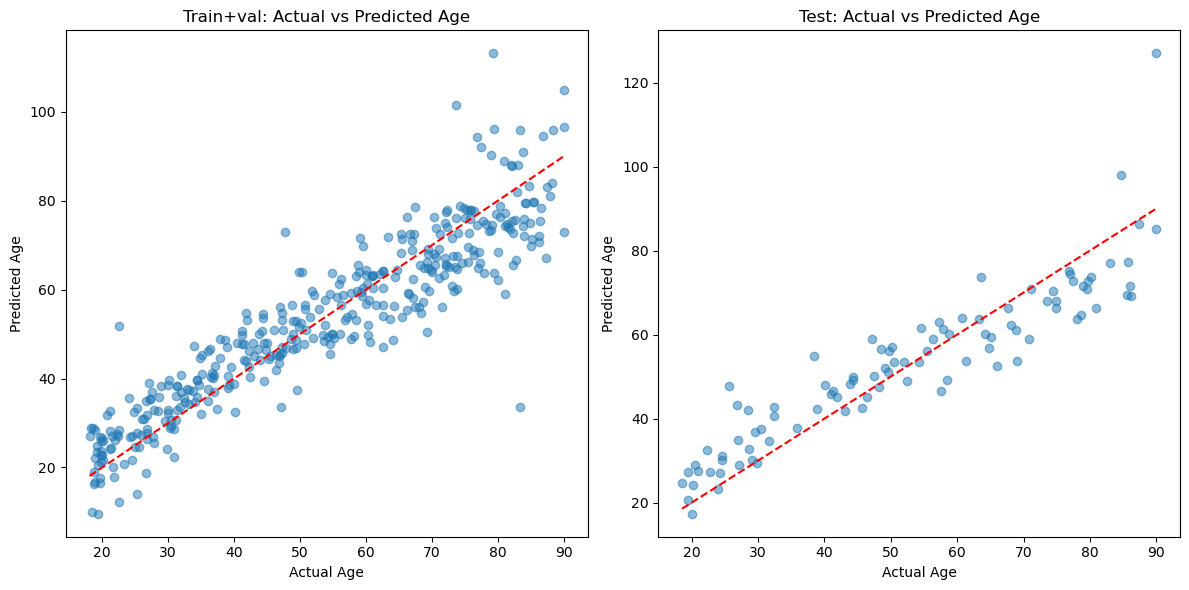

In [3]:
# Plot predicted vs actual age scatter plot for train and test sets
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# Train+val
plt.subplot(1, 2, 1)
plt.scatter(np.concatenate([y_age_train, y_age_val]), pred_trainval_lin, alpha=0.5)
plt.plot([np.concatenate([y_age_train, y_age_val]).min(), np.concatenate([y_age_train, y_age_val]).max()], [np.concatenate([y_age_train, y_age_val]).min(), np.concatenate([y_age_train, y_age_val]).max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Train+val: Actual vs Predicted Age")
# Test
plt.subplot(1, 2, 2)
plt.scatter(y_age_test, pred_test_lin, alpha=0.5)
plt.plot([y_age_test.min(), y_age_test.max()], [y_age_test.min(), y_age_test.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Test: Actual vs Predicted Age")
plt.tight_layout()
plt.show()

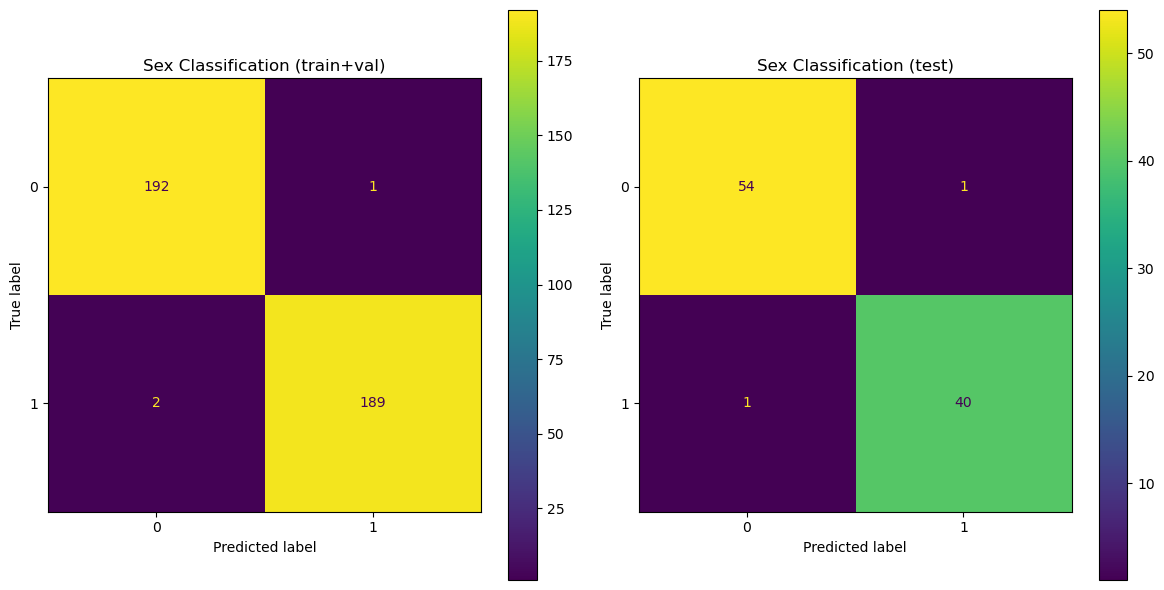

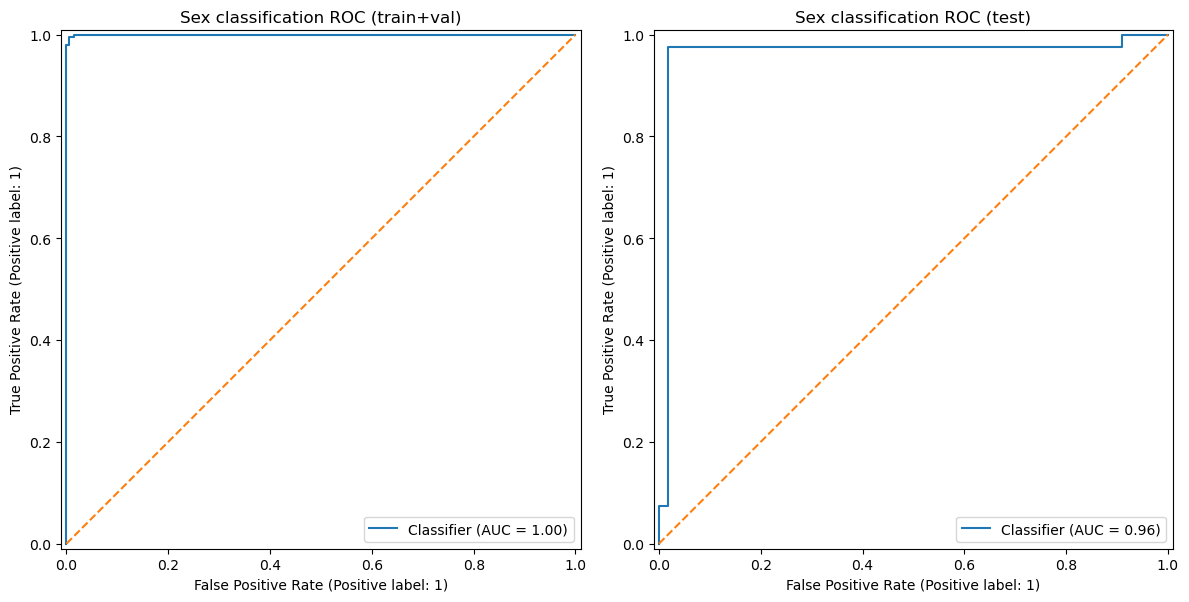

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Train+val
ConfusionMatrixDisplay.from_predictions(np.concatenate([y_sex_train, y_sex_val]), pred_trainval_cls,ax=axes[0], labels=[0,1])
axes[0].set_title("Sex Classification (train+val)")
# Test
ConfusionMatrixDisplay.from_predictions(y_sex_test, pred_test_cls, ax=axes[1], labels=[0,1])
axes[1].set_title("Sex Classification (test)")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Train+val
RocCurveDisplay.from_predictions(np.concatenate([y_sex_train, y_sex_val]), proba_trainval, ax=axes[0], pos_label=1)
axes[0].plot([0, 1], [0, 1], linestyle="--")
axes[0].set_title("Sex classification ROC (train+val)")
# Test
RocCurveDisplay.from_predictions(y_sex_test, proba_test, ax=axes[1], pos_label=1)
axes[1].plot([0, 1], [0, 1], linestyle="--")
axes[1].set_title("Sex classification ROC (test)")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np, joblib
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, average_precision_score, accuracy_score, f1_score

# Load features and labels
data = np.load("features_labels.npz")
Z_train, Z_val, Z_test = data["Z_train"], data["Z_val"], data["Z_test"]
y_age_train, y_age_val, y_age_test = data["y_age_train"], data["y_age_val"], data["y_age_test"]
y_sex_train, y_sex_val, y_sex_test = data["y_sex_train"], data["y_sex_val"], data["y_sex_test"]

# AGE (regression) with Decision Tree Regressor
best_depth, best_score = None, np.inf
for depth in range(1, 21):
	dtr = DecisionTreeRegressor(max_depth=depth, random_state=0)
	dtr.fit(Z_train, y_age_train)
	pred_val = dtr.predict(Z_val)
	mae = mean_absolute_error(y_age_val, pred_val)
	if mae < best_score:
		best_score, best_depth = mae, depth
print("Best depth for AGE:", best_depth)
# Refit on train+val with best depth
dtr = DecisionTreeRegressor(max_depth=best_depth, random_state=0)
dtr.fit(np.vstack([Z_train, Z_val]), np.concatenate([y_age_train, y_age_val]))
pred_test = dtr.predict(Z_test)
print("AGE  MAE:", mean_absolute_error(y_age_test, pred_test))
print("AGE RMSE:", mean_squared_error(y_age_test, pred_test) ** 0.5)
print("AGE   R2:", r2_score(y_age_test, pred_test))
joblib.dump(dtr, "age_dtr.joblib")

# SEX (classification) with Decision Tree Classifier
best_depth, best_auc = None, -np.inf
for depth in range(1, 21):
	dtc = DecisionTreeClassifier(max_depth=depth, class_weight="balanced", random_state=0)
	dtc.fit(Z_train, y_sex_train)
	proba_val = dtc.predict_proba(Z_val)[:, 1]
	auc = roc_auc_score(y_sex_val, proba_val)
	if auc > best_auc:
		best_auc, best_depth = auc, depth
print("Best depth for SEX:", best_depth)
# Refit on train+val with best depth
dtc = DecisionTreeClassifier(max_depth=best_depth, class_weight="balanced", random_state=0)
dtc.fit(np.vstack([Z_train, Z_val]), np.concatenate([y_sex_train, y_sex_val]))
proba_test = dtc.predict_proba(Z_test)[:, 1]
pred_test_cls = (proba_test >= 0.5).astype(int)
print("SEX   AUC:", roc_auc_score(y_sex_test, proba_test))
print("SEX  PR-AUC:", average_precision_score(y_sex_test, proba_test))
print("SEX   F1:", f1_score(y_sex_test, pred_test_cls))

Best depth for AGE: 2
AGE  MAE: 13.932758993161482
AGE RMSE: 16.56174969822265
AGE   R2: 0.31802548164423294
Best depth for SEX: 4
SEX   AUC: 0.9594807238394963
SEX  PR-AUC: 0.9211469534050178
SEX   F1: 0.9523809523809523


In [ ]:
import numpy as np, joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,roc_auc_score, average_precision_score, accuracy_score, f1_score, roc_curve
from sklearn.utils import check_random_state

SEED = 42
rng = check_random_state(SEED)

# Load features and labels
data = np.load("features_labels.npz")
Z_train, Z_val, Z_test = data["Z_train"], data["Z_val"], data["Z_test"]
y_age_train, y_age_val, y_age_test = data["y_age_train"], data["y_age_val"], data["y_age_test"]
y_sex_train, y_sex_val, y_sex_test = data["y_sex_train"], data["y_sex_val"], data["y_sex_test"]

# -------------- Hyperparameter-tuning helpers --------------
def pick_best_reg(params_grid, X_train, y_train, X_val, y_val):
    best, best_s, best_model = None, np.inf, None
    for hls in params_grid["hidden_layer_sizes"]:
        for alpha in params_grid["alpha"]:
            mlp = MLPRegressor(hidden_layer_sizes=hls, alpha=alpha, random_state=SEED, max_iter=5000, tol=1e-4, early_stopping=True)
            mlp.fit(X_train, y_train)
            pred = mlp.predict(X_val)
            mae = mean_absolute_error(y_val, pred)
            if mae < best_s:
                best, best_s, best_model = (hls, alpha), mae, mlp
    return best, best_s, best_model

def pick_best_cls(params_grid, X_train, y_train, sw_train, X_val, y_val):
    best, best_s, best_model = None, -np.inf, None
    for hls in params_grid["hidden_layer_sizes"]:
        for alpha in params_grid["alpha"]:
            mlp = MLPClassifier(hidden_layer_sizes=hls, alpha=alpha, random_state=SEED, max_iter=5000, tol=1e-4, early_stopping=True)
            mlp.fit(X_train, y_train, sample_weight=sw_train)
            proba = mlp.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, proba)
            if auc > best_s:
                best, best_s, best_model = (hls, alpha), auc, mlp
    return best, best_s, best_model

def choose_threshold_roc(y_true, proba):
    fpr, tpr, thr = roc_curve(y_true, proba)
    j = tpr - fpr
    return float(thr[np.argmax(j)])

grid_reg = {
    "hidden_layer_sizes": [(16,), (32,), (64,), (128,), (256,), (512,), (1024,)],
    "alpha": [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
}
grid_cls = {
    "hidden_layer_sizes": [(128), (256,128), (512,256,128)],
    "alpha": [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
}
# -----------------------------------------------------------

# =========================================================
# AGE: regression (tune on val MAE, refit on train+val)
# =========================================================
(best_hls, best_alpha), best_mae, best_mlp_age = pick_best_reg(grid_reg, Z_train, y_age_train, Z_val, y_age_val)
print("Best AGE MLP hidden_layer_sizes:", best_hls)
print("Best AGE MLP alpha:", best_alpha)

age_mlp = MLPRegressor(hidden_layer_sizes=best_hls, alpha=best_alpha, random_state=SEED, max_iter=5000,
                       tol=1e-4, early_stopping=True, n_iter_no_change=20, validation_fraction=0.1)
age_mlp.fit(np.vstack([Z_train, Z_val]), np.concatenate([y_age_train, y_age_val]))

pred_age = age_mlp.predict(Z_test)

print("AGE  MAE:", mean_absolute_error(y_age_test, pred_age))
print("AGE RMSE:", mean_squared_error(y_age_test, pred_age) ** 0.5)
print("AGE   R2:", r2_score(y_age_test, pred_age))
joblib.dump(age_mlp, "age_mlp.joblib")

# =========================================================
# SEX: classification (tune on val ROC-AUC, refit on train+val)
# =========================================================
# Class weights from training split
p_pos = float(y_sex_train.mean())
w_pos = 1.0 / (p_pos + 1e-9)
w_neg = 1.0 / (1.0 - p_pos + 1e-9)
sw_train = np.where(y_sex_train == 1, w_pos, w_neg)

(best_hls_c, best_alpha_c), best_auc, best_pipe_cls = pick_best_cls(grid_cls, Z_train, y_sex_train, sw_train, Z_val, y_sex_val)
print("Best SEX MLP hidden_layer_sizes:", best_hls_c)
print("Best SEX MLP alpha:", best_alpha_c)

# Threshold chosen on validation using the best tuned model
proba_val = best_pipe_cls.predict_proba(Z_val)[:, 1]
thr_star = choose_threshold_roc(y_sex_val, proba_val)
print("Chosen validation threshold:", thr_star)

# Recompute class weights on train+val for final refit
y_all_cls = np.concatenate([y_sex_train, y_sex_val])
p_pos_all = float(y_all_cls.mean())
w_pos_all = 1.0 / (p_pos_all + 1e-9)
w_neg_all = 1.0 / (1.0 - p_pos_all + 1e-9)
sw_all = np.where(y_all_cls == 1, w_pos_all, w_neg_all)

sex_mlp = MLPClassifier(hidden_layer_sizes=best_hls_c, alpha=best_alpha_c, random_state=SEED, max_iter=5000,
                        tol=1e-4, early_stopping=True, n_iter_no_change=20, validation_fraction=0.1)
sex_mlp.fit(np.vstack([Z_train, Z_val]), y_all_cls, sample_weight=sw_all)

proba_sex = sex_mlp.predict_proba(Z_test)[:, 1]
pred_sex  = (proba_sex >= thr_star).astype(int)

print("SEX ROC-AUC:", roc_auc_score(y_sex_test, proba_sex))
print("SEX  PR-AUC:", average_precision_score(y_sex_test, proba_sex))
print("SEX     ACC:", accuracy_score(y_sex_test, pred_sex))
print("SEX      F1:", f1_score(y_sex_test, pred_sex))
joblib.dump({"model": sex_mlp, "threshold": thr_star}, "sex_mlp.joblib")

Best AGE MLP hidden_layer_sizes: (128,)
Best AGE MLP alpha: 0.01
AGE  MAE: 11.074991654282103
AGE RMSE: 13.979902654576055
AGE   R2: 0.5140808567003435
Best SEX MLP hidden_layer_sizes: (512, 256, 128)
Best SEX MLP alpha: 1e-06
Chosen validation threshold: 0.9999081960884035
SEX ROC-AUC: 0.9535798583792289
SEX  PR-AUC: 0.909694599430363
SEX     ACC: 0.9444444444444444
SEX      F1: 0.9333333333333333


['sex_mlp.joblib']

Looks like linear models win for DNAm -> age prediction.

Next step: look into using AUTOENCODER to encoder the PCA features? Even necessary?